In [20]:
# import necessary package
import tensorflow as tf
import numpy as np
import pathlib
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [21]:
# Raw Dataset Directory
data_dir = pathlib.Path("./alexnet 3rd delete/")
image_count = len(list(data_dir.glob('*/*.jpg')))
# print total no of images for all classes
print(image_count)

100


In [22]:
# Initialize an empty dictionary to store class names and their corresponding image counts
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])
class_image_counts = {}

# Iterate over each class directory
for class_name in CLASS_NAMES:
    # Get the path to the class directory
    class_dir = data_dir / class_name
    
    # Count the number of images in the class directory
    num_images = len(os.listdir(class_dir))
    
    # Store the class name and its corresponding image count in the dictionary
    class_image_counts[class_name] = num_images
    
    # Print the class name and the number of images in the class
    print(f"Class: {class_name}, Number of Images: {num_images}")



Class: glioma, Number of Images: 25
Class: meningioma, Number of Images: 25
Class: notumor, Number of Images: 25
Class: pituitary, Number of Images: 25


In [23]:
#preprocess the data
BATCH_SIZE = 1             # Can be of size 2^n, but not restricted to. for the better utilization of memory
IMG_HEIGHT = 227            # input Shape required by the model
IMG_WIDTH = 227             # input Shape required by the model

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generate test data batches
test_data_gen = image_generator.flow_from_directory(
    directory=str(data_dir),
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    classes=list(CLASS_NAMES)
)


Found 100 images belonging to 4 classes.


In [24]:
#Loading the saved model
# new_model = tf.keras.models.load_model("AlexNet_saved_model/")
# Loading the saved model
new_model = tf.keras.models.load_model("AlexNet_saved_model_adamax_5000_8183.h5")

new_model.summary()
loss, acc = new_model.evaluate(test_data_gen)
print("accuracy:{:.2f}%".format(acc*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [25]:
# # Graph
# # Load the saved model
# new_model = tf.keras.models.load_model("AlexNet_saved_model_adamax_5000_8183.h5")
# new_model.summary()

# # Evaluate the model on test data
# loss, accuracy = new_model.evaluate(test_data_gen)
# print("Accuracy: {:.2f}%".format(accuracy * 100))


# # Train the model
# history = new_model.fit(
#     test_data_gen,
#     epochs=10,  # Use the same number of epochs as during training
#     verbose=1  # Set verbose to 1 to see training progress
# )

# predictions = new_model.predict(test_data_gen)
# predicted_classes = np.argmax(predictions, axis=1)

# # Get true labels
# true_classes = test_data_gen.classes

# # Compute confusion matrix
# cm = confusion_matrix(true_classes, predicted_classes)

# # Plot confusion matrix
# labels = test_data_gen.class_indices.keys()
# plt.figure(figsize=(8, 6))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()

# # Plot loss graph
# plt.plot(history.history['loss'], label='Loss')
# plt.title('Loss Over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Plot accuracy graph
# plt.plot(history.history['accuracy'], label='Accuracy')
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

<Figure size 800x600 with 0 Axes>

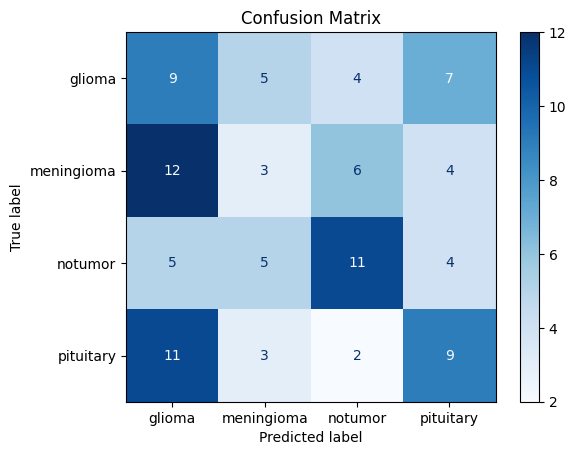

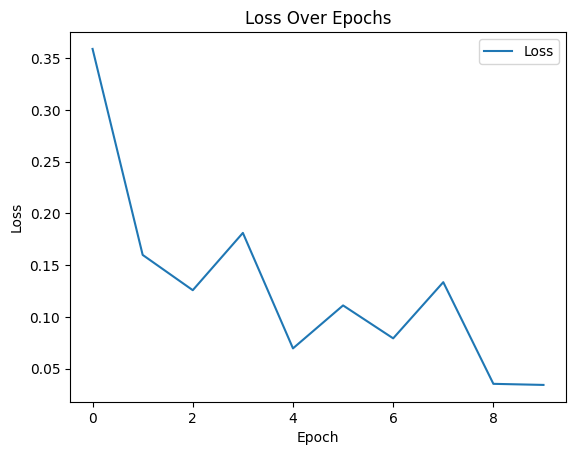

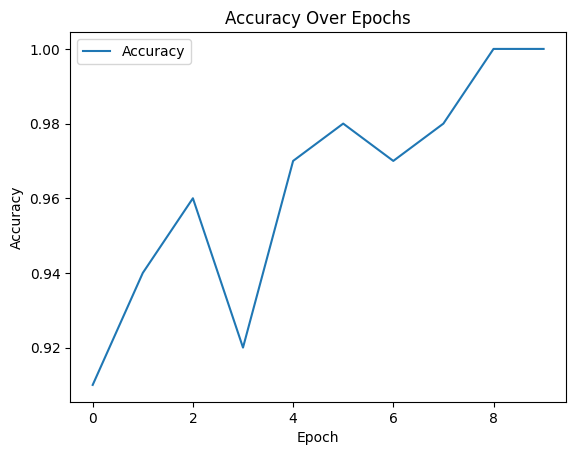

Misclassified Images:
glioma\Te-glTr_0001.jpg
glioma\Te-gl_0027.jpg
glioma\Te-gl_0030.jpg
glioma\Te-gl_0035.jpg
glioma\Te-gl_0048.jpg
glioma\Te-gl_0054.jpg
glioma\Te-gl_0055.jpg
glioma\Te-gl_0058.jpg
glioma\Te-gl_0061.jpg
glioma\Te-gl_0065.jpg
glioma\Te-gl_0075.jpg
glioma\Te-gl_0076.jpg
glioma\Te-gl_0077.jpg
glioma\Te-gl_0093.jpg
glioma\Te-gl_0096.jpg
glioma\Te-gl_0166.jpg
meningioma\Te-meTr_0003.jpg
meningioma\Te-meTr_0005.jpg
meningioma\Te-me_0010.jpg
meningioma\Te-me_0011.jpg
meningioma\Te-me_0012.jpg
meningioma\Te-me_0013.jpg
meningioma\Te-me_0014.jpg
meningioma\Te-me_0018.jpg
meningioma\Te-me_0029.jpg
meningioma\Te-me_0036.jpg
meningioma\Te-me_0039.jpg
meningioma\Te-me_0047.jpg
meningioma\Te-me_0051.jpg
meningioma\Te-me_0059.jpg
meningioma\Te-me_0071.jpg
meningioma\Te-me_0075.jpg
meningioma\Te-me_0078.jpg
meningioma\Te-me_0079.jpg
meningioma\Te-me_0084.jpg
meningioma\Te-me_0098.jpg
meningioma\Te-me_0244.jpg
meningioma\Te-me_0258.jpg
notumor\Te-no_0027.jpg
notumor\Te-no_0046.jpg
no

In [26]:
# Load the saved model
new_model = tf.keras.models.load_model("AlexNet_saved_model_adamax_5000_8183.h5")
new_model.summary()

# Evaluate the model on test data
loss, accuracy = new_model.evaluate(test_data_gen)
print("Accuracy: {:.2f}%".format(accuracy * 100))


# Train the model
history = new_model.fit(
    test_data_gen,
    epochs=10,  # Use the same number of epochs as during training
    verbose=1  # Set verbose to 1 to see training progress
)

predictions = new_model.predict(test_data_gen)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_data_gen.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
labels = test_data_gen.class_indices.keys()
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot loss graph
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Get misclassified images
misclassified_images = []
for i, (true_label, predicted_label) in enumerate(zip(true_classes, predicted_classes)):
    if true_label != predicted_label:
        misclassified_images.append(test_data_gen.filenames[i])

# Print names of misclassified images
print("Misclassified Images:")
for image_name in misclassified_images:
    print(image_name)